In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
dataset = pd.read_csv("Titanic-Dataset.csv")

In [2]:
#rimuoviamo la colonna dei ticket perchè irrilevante

In [14]:
dataset.drop(columns = ['Ticket'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


In [15]:
# Stampiamo le dimensioni del dataset (numero di righe e colonne) e le informazioni generali
print("Dimensioni del dataset:", dataset.shape)  # Dimensioni del dataset
dataset.info()  # Informazioni generali su tipi di dati e conteggio dei valori non nulli

# Calcoliamo il numero di valori mancanti per ogni colonna
missing_values = dataset.isnull().sum()

Dimensioni del dataset: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
# Leggi il dataset
dataset = pd.read_csv("Titanic-Dataset.csv")
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# Cell 5: Analisi delle variabili categoriche
# Identifichiamo le colonne con dati categorici e visualizziamo il conteggio di ciascuna categoria.
# Questo ci aiuta a capire meglio la distribuzione delle categorie.
categorical_columns = dataset.select_dtypes(include=['object']).columns  # Trova le colonne categoriche
for column in categorical_columns:
    print(f"Conteggio valori per la colonna '{column}':")
    print(dataset[column].value_counts())  # Conteggio dei valori per ogni categoria
    print("\n")

Conteggio valori per la colonna 'Name':
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64


Conteggio valori per la colonna 'Sex':
Sex
male      577
female    314
Name: count, dtype: int64


Conteggio valori per la colonna 'Ticket':
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64


Conteggio valori per la colonna 'Cabin':
Cabin
B96 B98        4
G

In [18]:
dataset = pd.read_csv("Titanic-Dataset.csv")
prima_classe = dataset[(dataset['Pclass'] == 1) & (dataset['Sex'] == 'male') & (dataset['Survived'] == 0)] 

prima_classe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


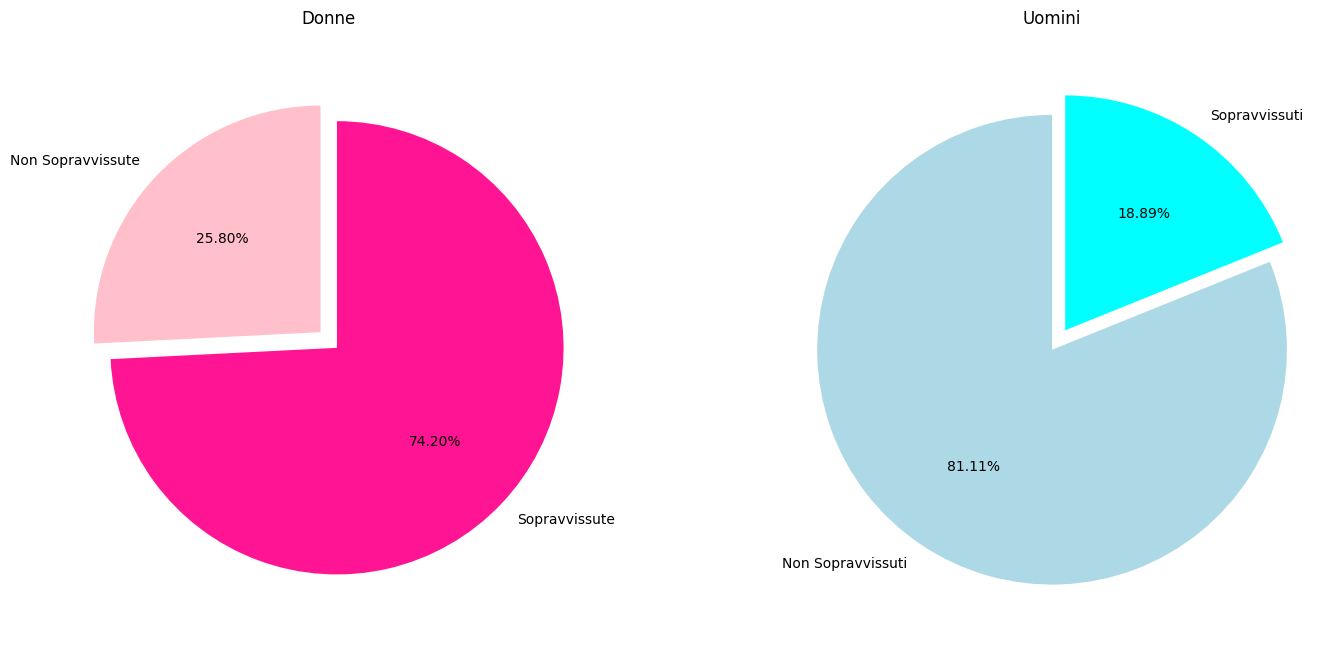

In [32]:
import matplotlib.pyplot as plt

# Creazione della figura e delle sottotrame
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # Figura più grande per mantenere le dimensioni dei grafici

# Grafico donne e sopravvivenza
donne = dataset[dataset['Sex'] == "female"]
contf = donne['Survived'].value_counts()

labels = ['Non Sopravvissute', 'Sopravvissute']
sizes = [contf[0], contf[1]]
colors = ['pink', 'deeppink']
explode = [0.1, 0]

axes[0].pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.2f%%', startangle=90)
axes[0].set_title("Donne")
axes[0].axis('equal')  # Per mantenere il grafico a torta circolare

# Grafico uomini e sopravvivenza
uomini = dataset[dataset['Sex'] == "male"]
contm = uomini['Survived'].value_counts()

labels = ['Non Sopravvissuti', 'Sopravvissuti']
sizes = [contm[0], contm[1]]
colors = ['lightblue', 'cyan']
explode = [0.1, 0]

axes[1].pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.2f%%', startangle=90)
axes[1].set_title("Uomini")
axes[1].axis('equal')  # Per mantenere il grafico a torta circolare

# Regolazione dello spazio orizzontale tra i grafici
plt.subplots_adjust(wspace=0.4)  # Regola il valore di wspace per aumentare la distanza

# Mostra i grafici
plt.show()

(np.float64(-1.1964097100254956),
 np.float64(1.1045905475701157),
 np.float64(-1.1019789770483057),
 np.float64(1.1415882991366497))

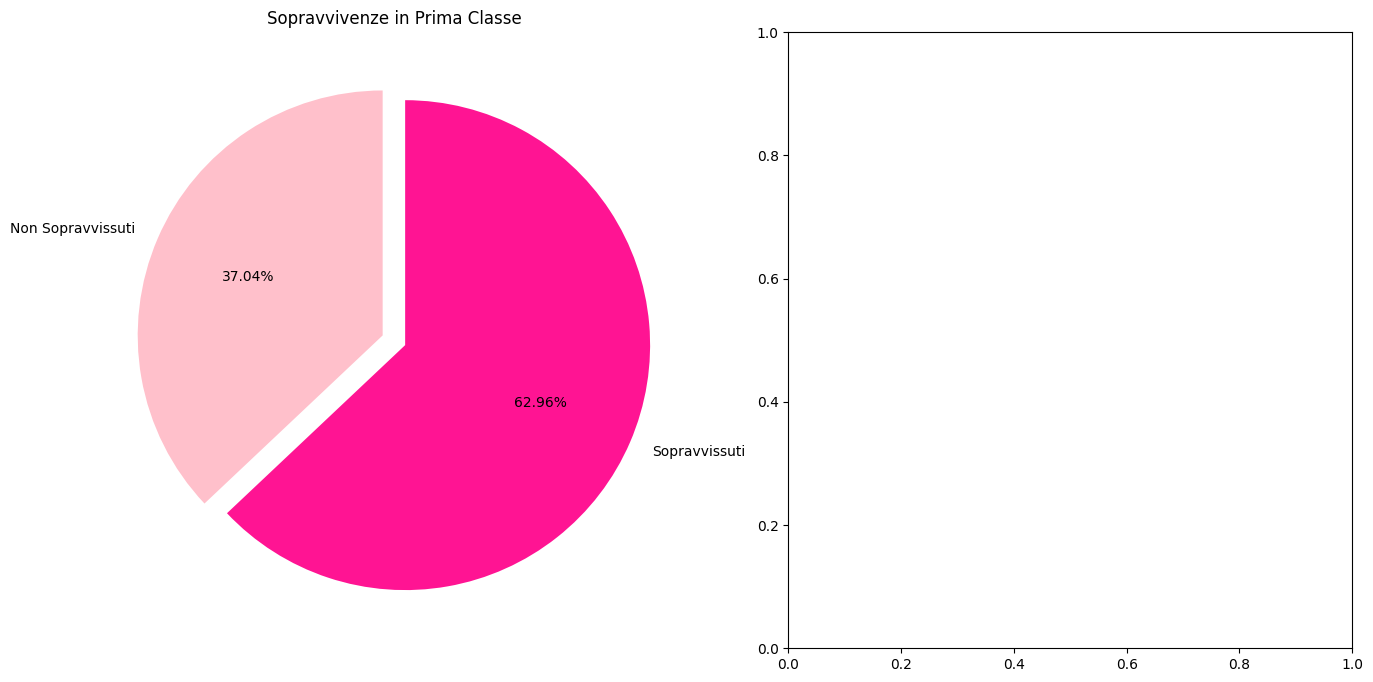

In [39]:
# Creazione della figura e delle sottotrame
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # Figura più grande per mantenere le dimensioni dei grafici

# Grafico donne e sopravvivenza
donne = dataset[(dataset['Pclass'] == 1)]
contf = donne['Survived'].value_counts()

labels = ['Non Sopravvissuti', 'Sopravvissuti']
sizes = [contf[0], contf[1]]
colors = ['pink', 'deeppink'] #colori
explode = [0.1, 0]

axes[0].pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.2f%%', startangle=90)
axes[0].set_title("Sopravvivenze in Prima Classe")
axes[0].axis('equal')  # Per mantenere il grafico a torta circolare


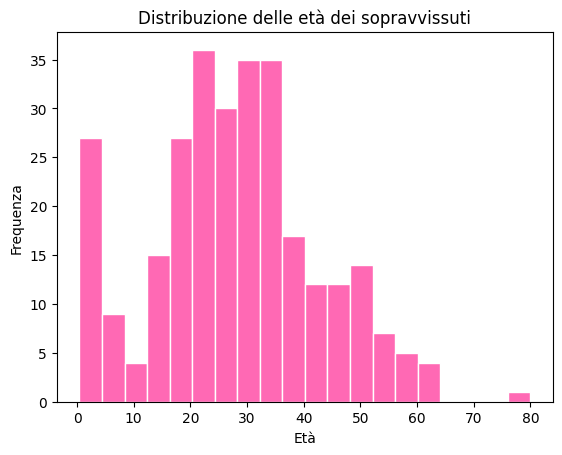

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

sopravvissuti = dataset[dataset['Survived'] == 1]
plt.hist(sopravvissuti['Age'], bins=20, color='hotpink', edgecolor='white')
plt.title("Distribuzione delle età dei sopravvissuti")
plt.xlabel("Età")
plt.ylabel("Frequenza")
plt.show()


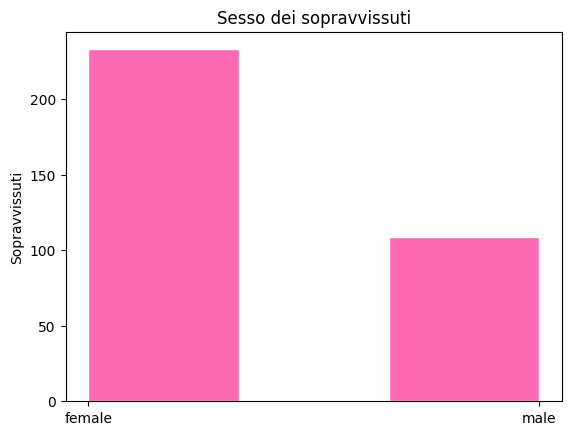

In [28]:
sopravvissuti = dataset[dataset['Survived'] == 1]
plt.hist(sopravvissuti['Sex'], bins=3, color='hotpink', edgecolor='white')
plt.title("Sesso dei sopravvissuti")
plt.ylabel('Sopravvissuti')
plt.show()

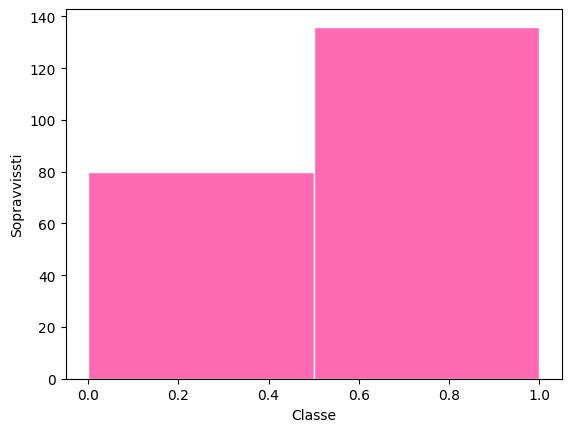

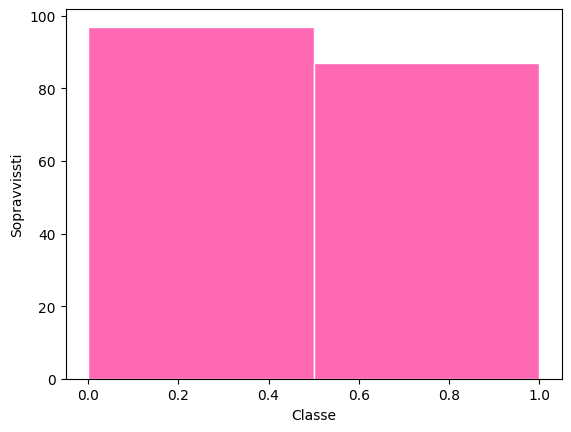

In [40]:
primaClasse = dataset[dataset['Pclass'] == 1]
plt.hist(primaClasse['Survived'], bins=2, color='hotpink', edgecolor='white')
plt.xlabel("Classe")
plt.ylabel("Sopravvissti")
plt.show()

secondaClasse = dataset[dataset['Pclass'] == 2]
plt.hist(secondaClasse['Survived'], bins=2, color='hotpink', edgecolor='white')
plt.xlabel("Classe")
plt.ylabel("Sopravvissti")
plt.show()


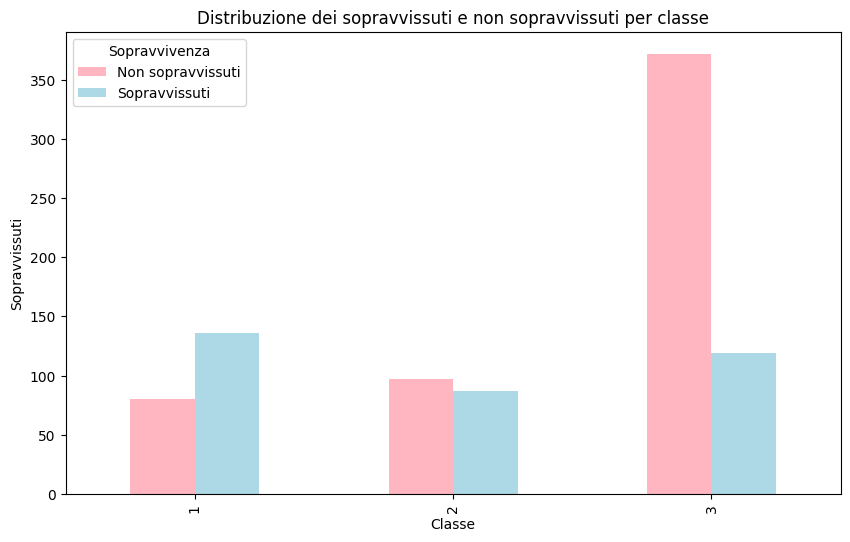

In [44]:
sopravvissutiPerClasse = dataset.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

sopravvissutiPerClasse.plot(kind='bar', stacked=False, figsize=(10, 6), color=['lightpink', 'lightblue'])

plt.title("Distribuzione dei sopravvissuti e non sopravvissuti per classe")
plt.xlabel("Classe")
plt.ylabel("Sopravvissuti")
plt.legend(['Non sopravvissuti', 'Sopravvissuti'], title='Sopravvivenza')

plt.show()
